# Calculating snowfall removal budget

<b>Table of Contents</b>

- Overview
- Setup
    - Get Authentication Token
- Make Query
    - Plot the Data
    - Determine the snow removal budget by perfomring the necessary calculations
- Understanding the sample
- Related Links

## Overview

APIs that are used in this sample: **IBM Environmental Intelligence Suite- History on Demand Direct API**

You can calculate the cost to clear snowfall. In this sample, we will analyze the snowfall data to understand the snow accumulation by comparing it to the average snowfall for the same period over the past years. With this analysis, we can calculate the maintenance costs of clearing snow for a local government organization. Please refer to [Introduction](../../tutorials/Introduction.ipynb) to learn more about how HoD APIs work.


## Setup

All of the documentation and samples we provide are built using Jupyter notebooks.

The following basic requirements must be met to run the notebooks:

1. A Python 3.7 or higher environment
2. A Jupyter Notebook environment

Note: The notebooks include runnable examples, but you need to run them in order from top to end. This requirement is because some lines of set up code, for example, setting authentication credentials, only appear in the first code cell. We omit them in the subsequent cells to avoid clutter.

To run this notebook seamlessly, you must first configure your EI API credentials in a file named `secrets.ini` in the following format:

```
[EI]
api.api_key = <Your EI API key>
api.org_id = <Your EI Org Id>
api.tenant_id = <Your EI Tenant Id>
```

Keep the secrets.ini file at an appropriate relative location of this notebook, for example, as specified in the following config:

```config.read('../../auth/secrets.ini')```

Run this notebook, cell after cell.

## Analyse the Snow Data by retrieving the data required by following the below steps.

Import all the libraries and packages that are needed to run this notebook.

In [ ]:
%pip install configparser
%pip install pandas
%pip install requests
%pip install matplotlib

In [2]:
#Import required libraries
import pandas as pd

import requests
import matplotlib
from pprint import pprint
import pandas as pd
import configparser
import json
from pandas import json_normalize

### Get Authentication Token

Now, we will set up the API Credentials as listed in following code and get an authentication token needed to run and retrieve the data.

In [ ]:
config = configparser.RawConfigParser()
config.read('../../auth/secrets.ini')

EI_API_KEY     = config.get('EI', 'api.api_key')
EI_ORG_ID     = config.get('EI', 'api.org_id') 
EI_TENANT_ID     = config.get('EI', 'api.tenant_id')

EI_AUTH_ENDPOINT = "https://api.ibm.com/saascore/run/authentication-retrieve"
EI_API_BASE_URL  = "https://api.ibm.com/geospatial/run/v3/wx"
EI_API_ENDPOINT  = f"{EI_API_BASE_URL}/hod/r1/direct"

EI_AUTH_CLIENT_ID  = 'saascore-' + EI_TENANT_ID
EI_CLIENT_ID = 'geospatial-' + EI_TENANT_ID

auth_request_headers: dict = {}
auth_request_headers["X-IBM-Client-Id"] = EI_AUTH_CLIENT_ID
auth_request_headers["X-API-Key"] = EI_API_KEY

verify = True

auth_url = f"{EI_AUTH_ENDPOINT}/api-key?orgId={EI_ORG_ID}"
              
response = requests.get(url = auth_url,
                        headers = auth_request_headers,
                        verify  = verify
                       )
if response.status_code == 200:
    jwt_token = response.text
    print("Authentication Success")
else:     
    print("Authentication Failed")
    print(response.text)

Authentication Success


## Make Query

Once the API credentials are setup, we will build the required query parameters and headers for making an HOD Direct API call. 
With the query parameters and the headers setup, we will send an HTTP GET Request to the HOD Direct API Endpoint and get back the response.
This API response is a JSON structure which we'll convert to Dataframe and display.

There are various parameters you can send to retrieve the snowfall information for a particular location:
1. Either by using the geo coordinates or a postalKey of the desired location.
2. startDateTime and endDateTime for the location.
3. the required format for the output to be retrieved, in this case JSON and many other parameters required.


In [4]:
# Create the query parameter
# provide the geocode cordinates, startdatetime, enddatatime, format as json, units as per your requirements to get data
query_params: dict = {}
query_params["startDateTime"] = "2023-03-07T00"
query_params["endDateTime"] = "2023-04-07T23"
query_params["format"] = "json"
query_params["units"] = "e"
query_params["compact"] = "false"
query_params["postalKey"] = "80301:US"

# Create the query headers
query_request_headers: dict = {}
query_request_headers["x-ibm-client-id"] = EI_CLIENT_ID
query_request_headers["Authorization"] = "Bearer " + jwt_token

# Create the Request object as GET Request with host URL, query parameters and query headers
request = requests.Request('GET', EI_API_ENDPOINT, params=query_params, headers=query_request_headers)
 
# Create a Session object and send the request
session = requests.Session()
response = session.send(request.prepare())
print(response)

if response.text != "":
    # Get the response as json
    response_json = response.json()
    
    # Get json and convert to dataframe
    json_str = json.dumps(response_json)
    dict = json.loads(json_str)
    dataframe = json_normalize(dict) 
    
    # display
    #pprint(response_json)
    print("\n\n")
    pd.set_option('display.max_colwidth', None)
    display(dataframe) 
else:
    print("Empty Response")

<Response [200]>





,requestedLatitude,requestedLongitude,latitude,longitude,gridpointId,validTimeUtc,drivingDifficultyIndex,iconCode,iconCodeExtended,precip1Hour,...,temperatureChange24Hour,temperatureMax24Hour,temperatureMin24Hour,temperatureDewPoint,temperatureFeelsLike,uvIndex,visibility,windDirection,windGust,windSpeed
0,40.04628,-105.199184,40.065934,-105.205091,9xj5vvzbzxqqn,2023-04-01T00:20:00+0000,0,32,3200,0.0,...,-5.8,56.6,36.4,8.7,39.5,0,10.00,290.0,32.0,16.1
1,40.04628,-105.199184,40.065934,-105.205091,9xj5vvzbzxqqn,2023-04-01T01:20:00+0000,0,32,3200,0.0,...,-0.1,49.9,36.4,6.5,42.0,0,10.00,300.0,22.1,10.5
2,40.04628,-105.199184,40.065934,-105.205091,9xj5vvzbzxqqn,2023-04-01T02:20:00+0000,0,31,3100,0.0,...,-1.2,49.9,36.4,7.3,41.6,0,10.00,320.0,NaN,6.0
3,40.04628,-105.199184,40.065934,-105.205091,9xj5vvzbzxqqn,2023-04-01T03:20:00+0000,0,33,3300,0.0,...,-2.3,49.9,36.4,9.8,39.5,0,10.00,30.0,NaN,5.6
4,40.04628,-105.199184,40.065934,-105.205091,9xj5vvzbzxqqn,2023-04-01T04:20:00+0000,0,29,2900,0.0,...,-1.4,49.9,36.4,11.9,39.8,0,10.00,220.0,NaN,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,40.04628,-105.199184,40.065934,-105.205091,9xj5vvzbzxqqn,2023-04-07T18:20:00+0000,0,32,3200,0.0,...,6.5,58.4,27.8,13.9,58.4,6,10.00,100.0,NaN,2.2
163,40.04628,-105.199184,40.065934,-105.205091,9xj5vvzbzxqqn,2023-04-07T19:20:00+0000,0,32,3200,0.0,...,6.9,61.3,27.8,14.5,61.3,6,10.00,90.0,NaN,3.6
164,40.04628,-105.199184,40.065934,-105.205091,9xj5vvzbzxqqn,2023-04-07T20:20:00+0000,0,32,3200,0.0,...,7.7,64.0,27.8,12.1,64.0,6,10.00,110.0,NaN,2.9
165,40.04628,-105.199184,40.065934,-105.205091,9xj5vvzbzxqqn,2023-04-07T21:20:00+0000,0,32,3200,0.0,...,8.1,65.9,27.8,12.1,65.8,4,10.00,200.0,NaN,6.3


As we can see, the information retrieved has a lot of data for the specified location. The dataframe consists of a total of 40 columns and 167 rows with all the information needed for the analysis.

### Plot the Data

Now that we have retrieved the data, we can plot it on a graph to visualize how the temparature and temperatureDewPoint relates with each other across different time periods by using the code below.

<Axes: title={'center': 'temperature and temperatureDewPoint over the day'}, xlabel='validTimeUtc'>

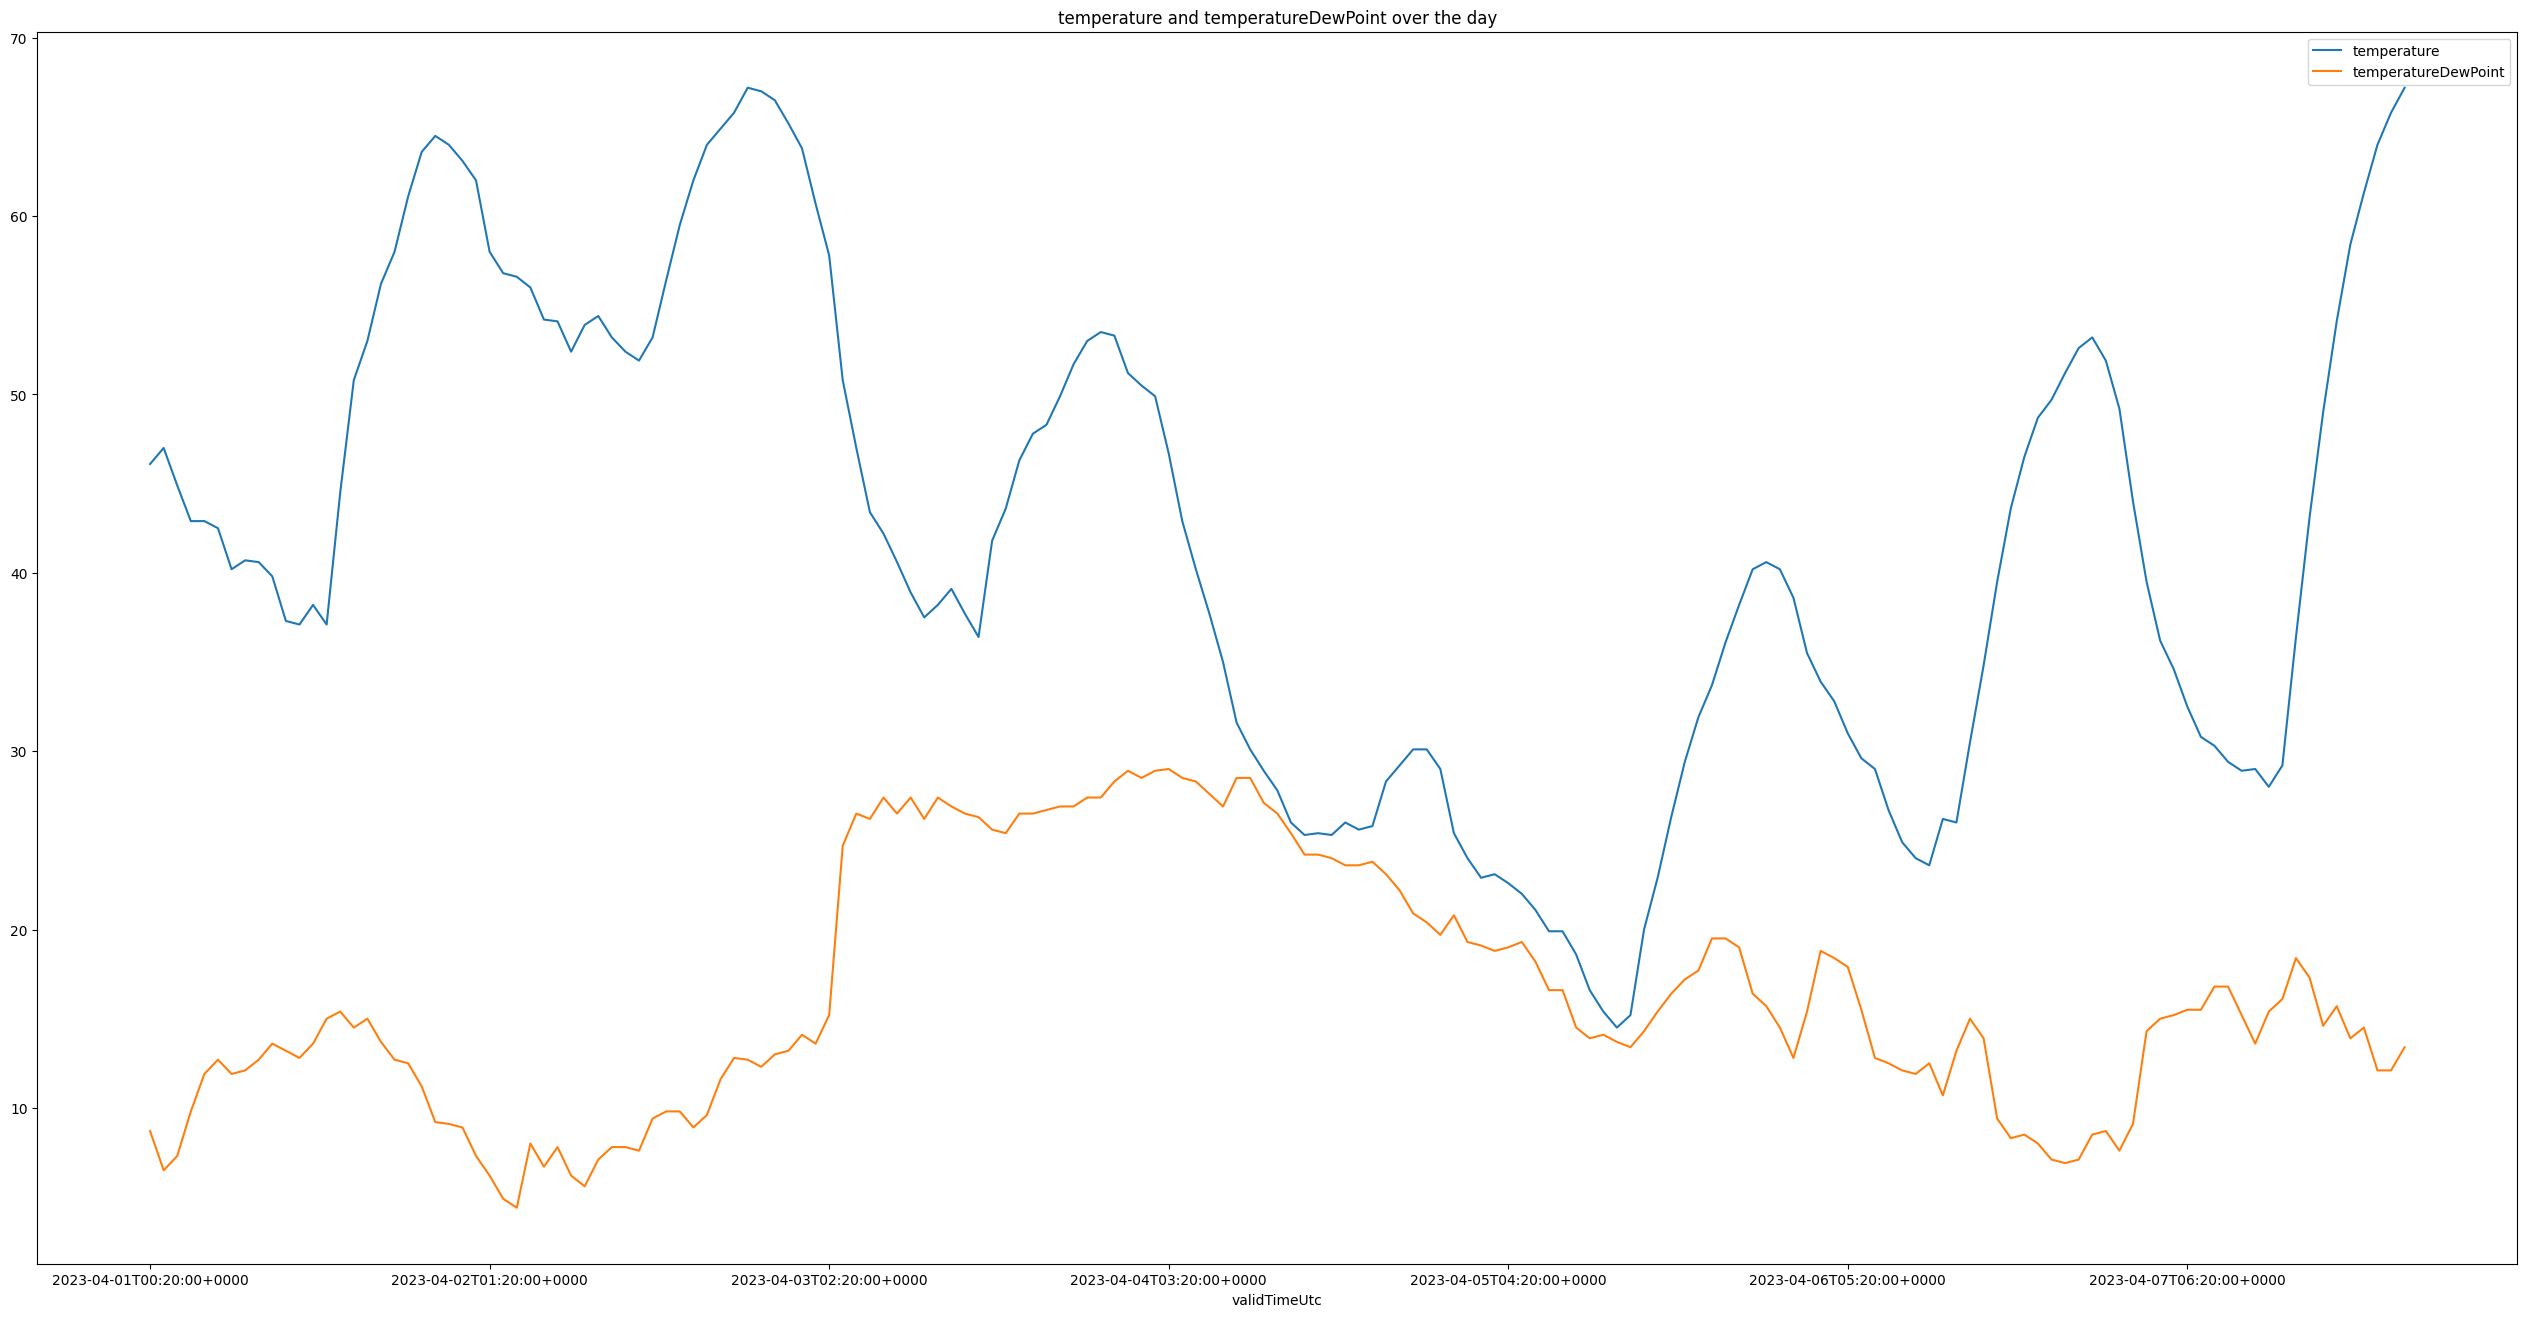

In [5]:
dataframe.plot(x='validTimeUtc',y=['temperature','temperatureDewPoint'],figsize=(32,16), title='temperature and temperatureDewPoint over the day')

<Axes: title={'center': 'snow and precipitation over the day'}, xlabel='validTimeUtc'>

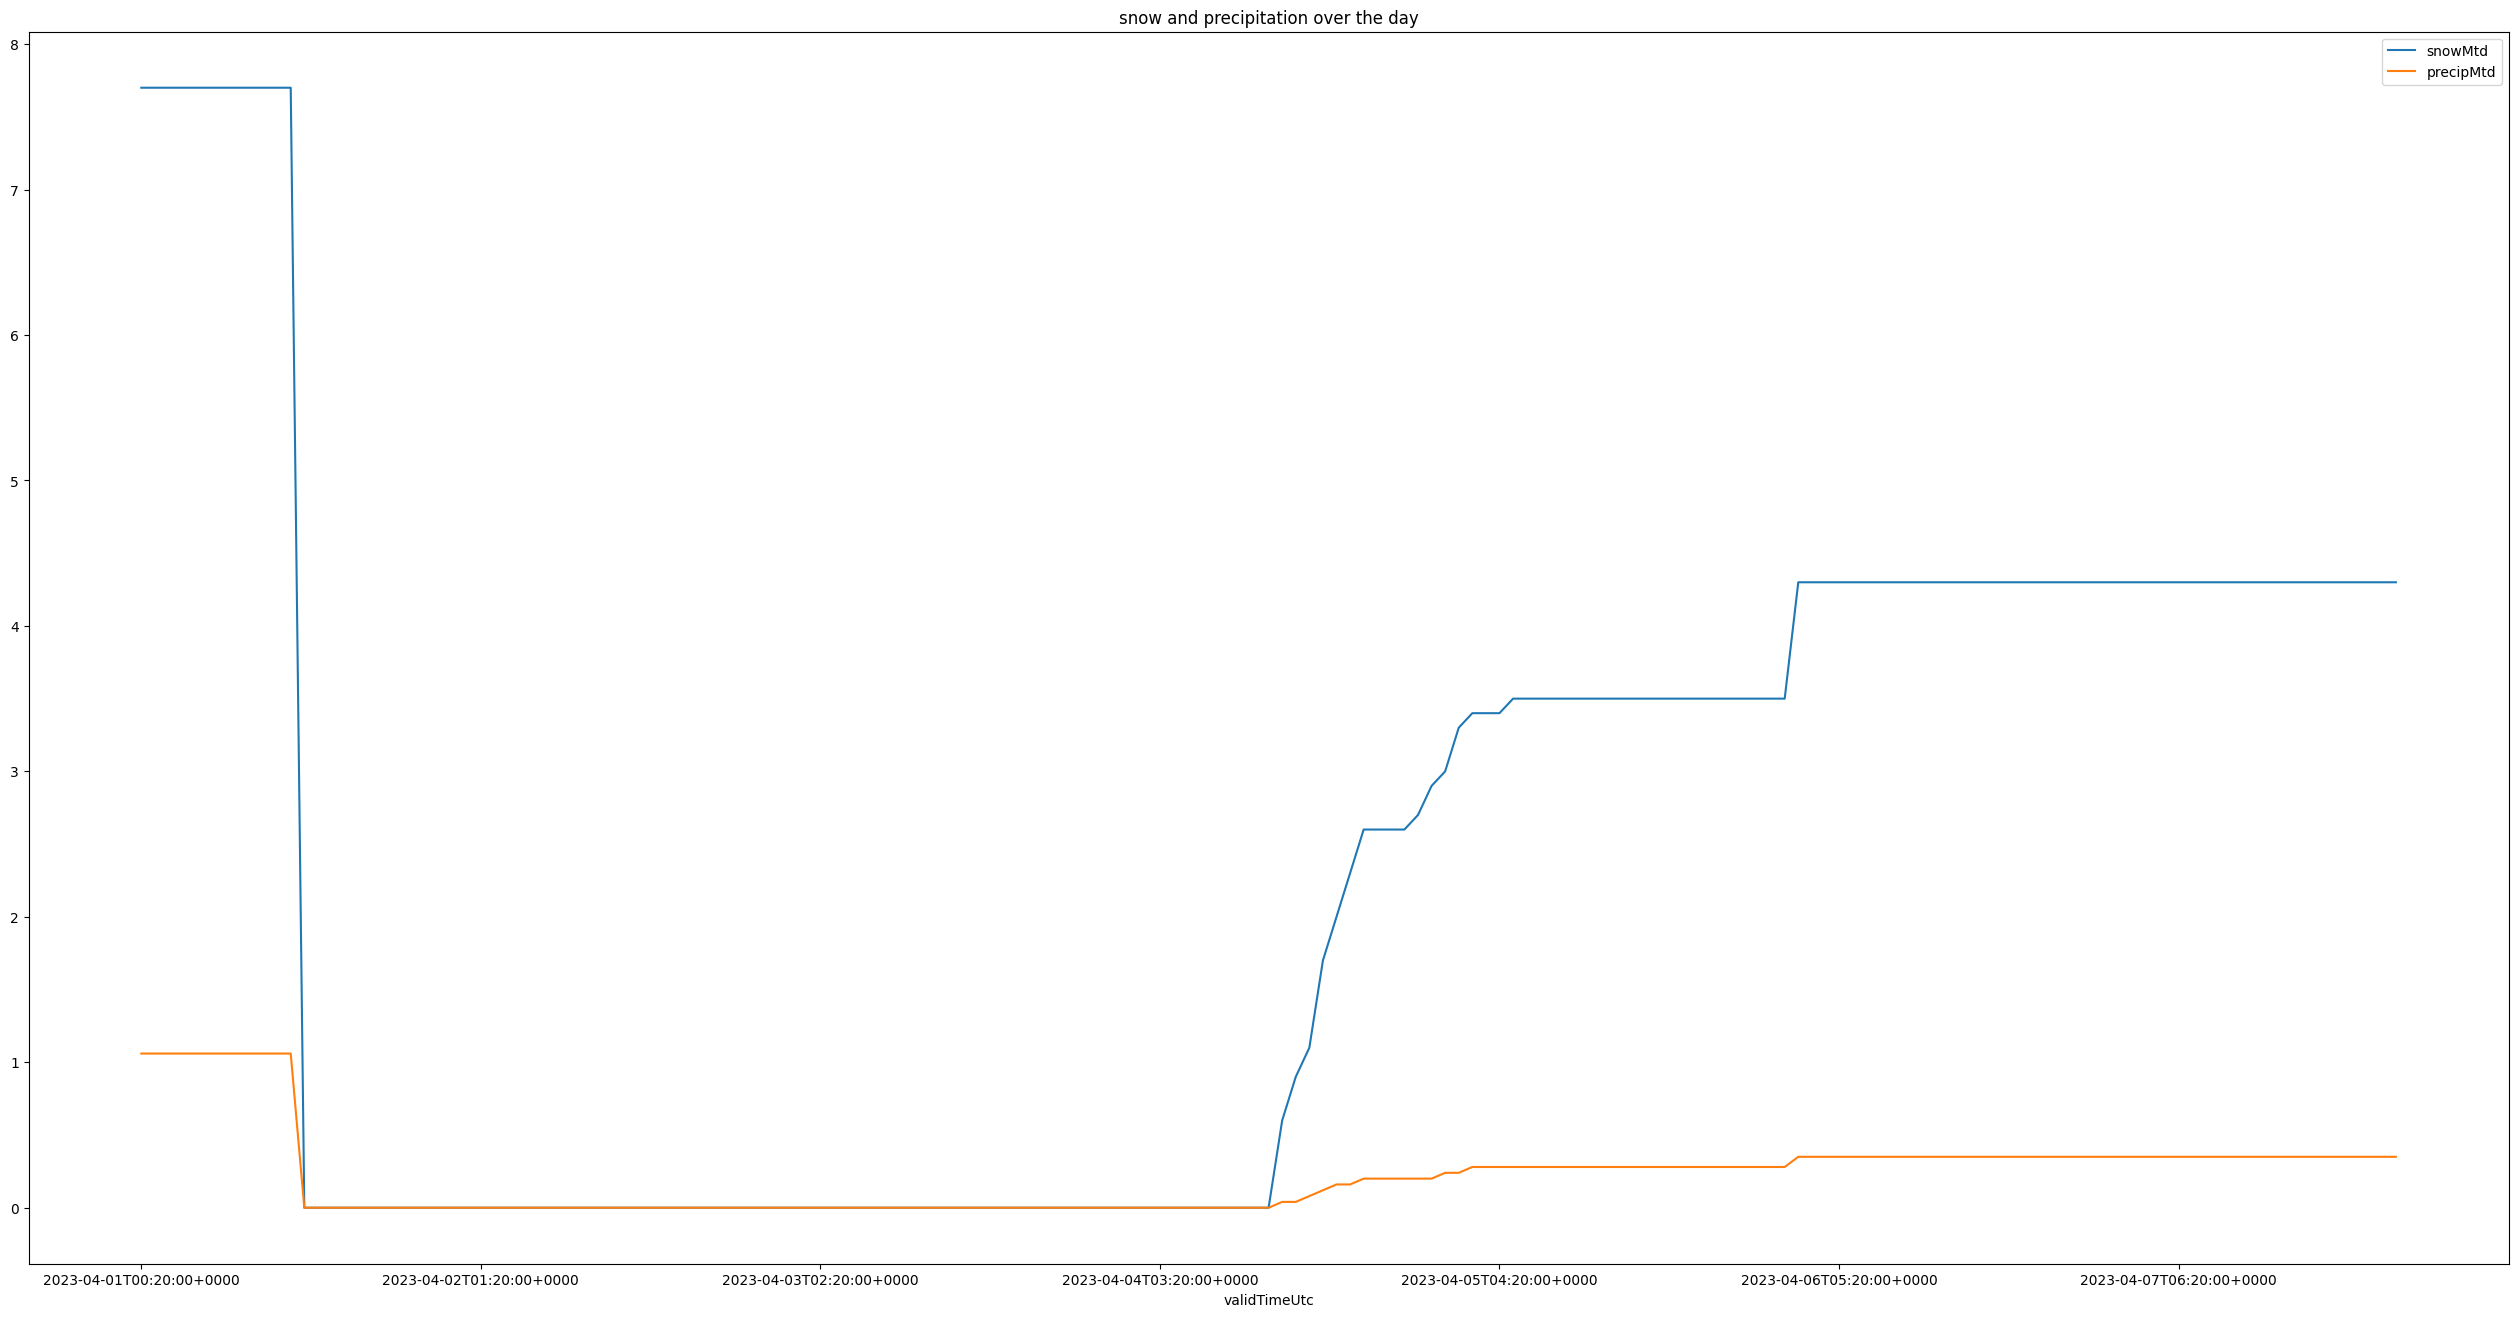

In [15]:
dataframe.plot(x='validTimeUtc', y=['snowMtd', 'precipMtd'], figsize=(32, 16), title='snow and precipitation over the day')

### Determine the snow removal budget by performing the necessary calculations

We can now sum up the data for precip1Hour and snow1Hour columns to get the whole value for precipitation and snow respectively.

In [7]:
#sum up precip and snow for March
marPrecip2023 = dataframe['precip1Hour'].sum()
MarSnow2023 = dataframe['snow1Hour'].sum()
print (marPrecip2023,MarSnow2023)

0.21000000000000002 2.9


We can now compare the variance between March 2023 and historical averages using the values in the dictionary below.

In [8]:
# Data in dictionary form
data = {
    'almanacInterval': [0],
    'almanacRecordDate': ['M'],
    'almanacRecordPeriod': [101],
    'almanacRecordYearMax': [2005],
    'almanacRecordYearMin': [1930],
    'precipitationAverage': [0.76],
    'snowAccumulationAverage': [16.03],
    'stationId': [50848],
    'stationName': ['BOULDER'],
    'temperatureAverageMax': [47],
    'temperatureAverageMin': [22],
    'temperatureMean': [35],
    'temperatureRecordMax': [73],
    'temperatureRecordMin': [-33]
}

# Convert dictionary to DataFrame
snowfall_normal_df = pd.DataFrame(data)

Let's display the snowAccumulationAverage from the above data.

In [9]:
Mar_normal_snow =  snowfall_normal_df['snowAccumulationAverage'].item()
print (Mar_normal_snow)

16.03


Perform the following calculations to get the costs incurred to remove the accumulated snow.

In [10]:
# We know that Boulder's average snowfall is 88.3" and that the annual snow removal budget is $2M

PercentAnnualSnowInMar = round((MarSnow2023 / 88.3),2)
Mar_percentnormal = round((MarSnow2023 / Mar_normal_snow),2)
print(f"Percent Annual Snow in Mar: {PercentAnnualSnowInMar}\nMarch percent normal: {Mar_percentnormal}")

Percent Annual Snow in Mar: 0.03
March percent normal: 0.18


Get the normal cost of snow removal in March using the data we have.

In [11]:
# Normal Cost of snow removal in the month of March
normal_Mar_cost = 2000000 * (Mar_normal_snow / 88.3)
print(f"Normal March Cost: {round(normal_Mar_cost,2)}")

Normal March Cost: 363080.41


Now that we have the normal cost for snow removal in March, let's calculate the cost of March 2023 using the following code snippet.

In [12]:
#cost of snow removal in the month of March 2023
Mar2023_cost = normal_Mar_cost * Mar_percentnormal
print(f"March 2023 cost: {round(Mar2023_cost,2)}")

March 2023 cost: 65354.47


Let's calculate the difference in snow removal costs in March 2023 vs normal March in Boulder.

In [13]:
#2023 budget 
delta = normal_Mar_cost - Mar2023_cost
print (f"2023 low snow totals reduced the City of Boulder's spend by ${round(delta,2)}")

2023 low snow totals reduced the City of Boulder's spend by $297725.93


## Understanding the sample

By using the calculations above, we are able to determine that the cost of snow removal in March is ordinarily $297,725.93 more expensive than the approximate cost of snow removal in March 2023 for the city of Boulder.

## Related Links
[HOD Direct API Developer Guide](https://developer.ibm.com/apis/catalog/envintelsuite--ibm-environmental-intelligence/HoD+Direct+API)